In [448]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Loading Dataset

In [449]:
df = pd.read_csv('AIDS_Classification.csv')
df.head()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
0,948,2,48,89.8128,0,0,0,100,0,0,...,0,1,0,1,0,422,477,566,324,0
1,1002,3,61,49.4424,0,0,0,90,0,1,...,1,3,0,1,0,162,218,392,564,1
2,961,3,45,88.4520,0,1,1,90,0,1,...,1,3,0,1,1,326,274,2063,1893,0
3,1166,3,47,85.2768,0,1,0,100,0,1,...,1,3,0,1,0,287,394,1590,966,0
4,1090,0,43,66.6792,0,1,0,100,0,1,...,1,3,0,0,0,504,353,870,782,0


In [450]:
df.shape

(2139, 23)

In [451]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2139 entries, 0 to 2138
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   time      2139 non-null   int64  
 1   trt       2139 non-null   int64  
 2   age       2139 non-null   int64  
 3   wtkg      2139 non-null   float64
 4   hemo      2139 non-null   int64  
 5   homo      2139 non-null   int64  
 6   drugs     2139 non-null   int64  
 7   karnof    2139 non-null   int64  
 8   oprior    2139 non-null   int64  
 9   z30       2139 non-null   int64  
 10  preanti   2139 non-null   int64  
 11  race      2139 non-null   int64  
 12  gender    2139 non-null   int64  
 13  str2      2139 non-null   int64  
 14  strat     2139 non-null   int64  
 15  symptom   2139 non-null   int64  
 16  treat     2139 non-null   int64  
 17  offtrt    2139 non-null   int64  
 18  cd40      2139 non-null   int64  
 19  cd420     2139 non-null   int64  
 20  cd80      2139 non-null   int6

time        0
trt         0
age         0
wtkg        0
hemo        0
homo        0
drugs       0
karnof      0
oprior      0
z30         0
preanti     0
race        0
gender      0
str2        0
strat       0
symptom     0
treat       0
offtrt      0
cd40        0
cd420       0
cd80        0
cd820       0
infected    0
dtype: int64

# 2. Exploring Data

## 2.1. Target

In [452]:
df['karnof'].unique()

array([100,  90,  80,  70], dtype=int64)

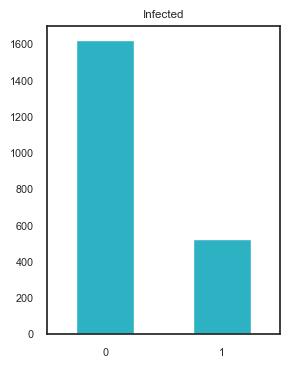

In [453]:
plt.figure(figsize=(3,4))
df['infected'].value_counts().plot(kind='bar', rot=0, color='#2DB2C4')
plt.title('Infected')
plt.show()

## 2.2. Predictors

### 2.2.1. Numerical features

In [454]:
num_cols = ['time', 'age', 'wtkg', 'preanti', 
           'cd40', 'cd420', 'cd80', 'cd820']
df[num_cols].describe()

,time,age,wtkg,preanti,cd40,cd420,cd80,cd820
count,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000
mean,879.098177,35.248247,75.125311,379.175783,350.501169,371.307153,986.627396,935.369799
std,292.274324,8.709026,13.263164,468.657526,118.573863,144.634909,480.197750,444.976051
min,14.000000,12.000000,31.000000,0.000000,0.000000,49.000000,40.000000,124.000000
25%,727.000000,29.000000,66.679200,0.000000,263.500000,269.000000,654.000000,631.500000
50%,997.000000,34.000000,74.390400,142.000000,340.000000,353.000000,893.000000,865.000000
75%,1091.000000,40.000000,82.555200,739.500000,423.000000,460.000000,1207.000000,1146.500000
max,1231.000000,70.000000,159.939360,2851.000000,1199.000000,1119.000000,5011.000000,6035.000000


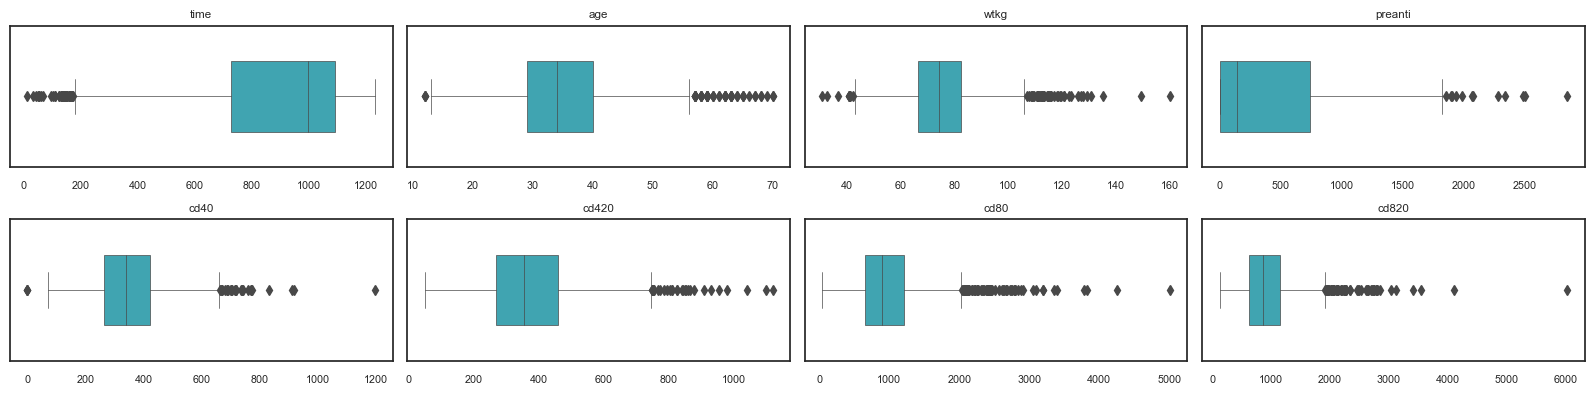

In [455]:
num_plots = len(num_cols)
cols_per_row = 4
rows = (num_plots - 1) // cols_per_row + 1

fig, axes = plt.subplots(nrows=rows, ncols=cols_per_row, figsize=(16, 4))
axes = axes.flatten()
sns.set_style("white")

for i, column in enumerate(num_cols):
    ax = axes[i]
    sns.boxplot(data=df, x=column, ax=ax, linewidth=0.5,
                color='#2DB2C4', width=0.5)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_title(column)

for i in range(num_plots, len(axes)):
    fig.delaxes(axes[i])
    
plt.tight_layout()
plt.show()

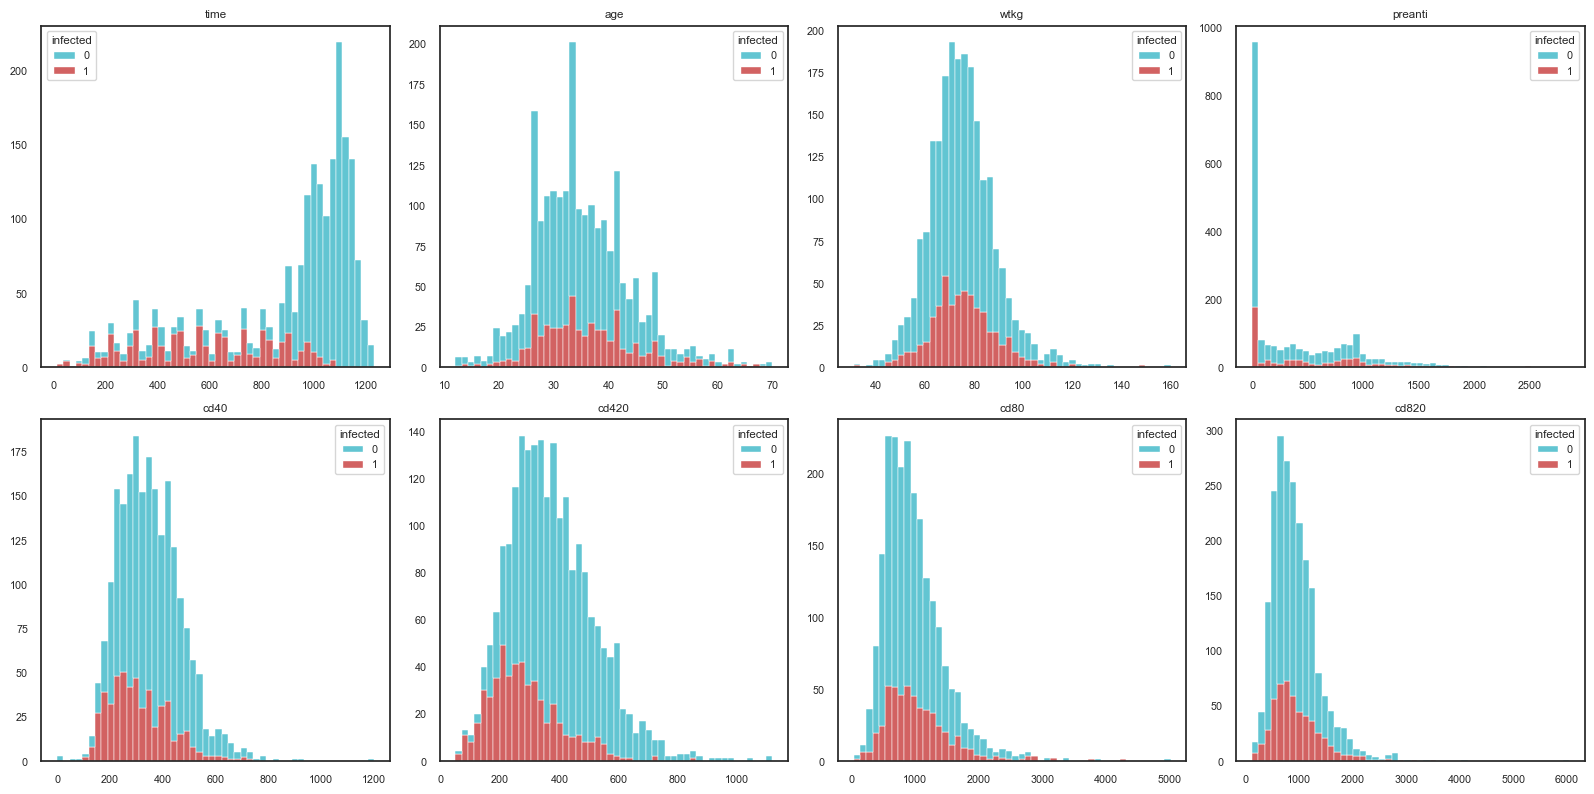

In [456]:
num_plots = len(num_cols)
cols_per_row = 4
rows = (num_plots - 1) // cols_per_row + 1

fig, axes = plt.subplots(nrows=rows, ncols=cols_per_row, figsize=(16, 8))
axes = axes.flatten()
sns.set_style("white")

for i, column in enumerate(num_cols):
    ax = axes[i]
    sns.histplot(data=df, x=column, ax=ax, hue='infected',
                 palette=['#2DB2C4','#C42D2D'],
                 bins=50, multiple='stack')
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_title(column)

for i in range(num_plots, len(axes)):
    fig.delaxes(axes[i])
    
plt.tight_layout()
plt.show()

### 2.2.2. Categorical features

#### a. Personal information

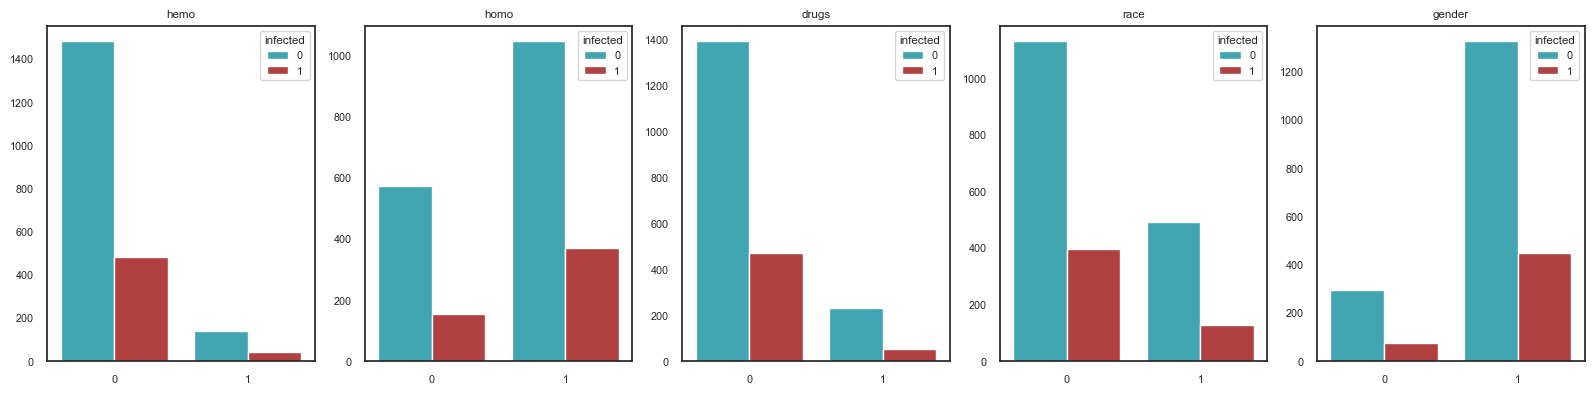

In [457]:
info_cols = ['hemo', 'homo', 'drugs', 'race', 'gender']
info_plots = len(info_cols)
cols_per_row = 5
rows = (info_plots - 1) // cols_per_row + 1

fig, axes = plt.subplots(nrows=rows, ncols=cols_per_row, figsize=(16, 4))
axes = axes.flatten()
sns.set_style("white")

for i, column in enumerate(info_cols):
    ax = axes[i]
    contingency_tab = pd.crosstab(df[column], df['infected']).reset_index()
    melted_df = pd.melt(contingency_tab, id_vars=[column],
                        var_name='infected', value_name='Value')
    sns.barplot(data=melted_df, x=column, y='Value', ax=ax,
                hue='infected', palette=['#2DB2C4','#C42D2D'])
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_title(column)

# Remove empty subplots if the number of plots doesn't fill the entire grid
for i in range(info_plots, len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()

#### b. Lab results

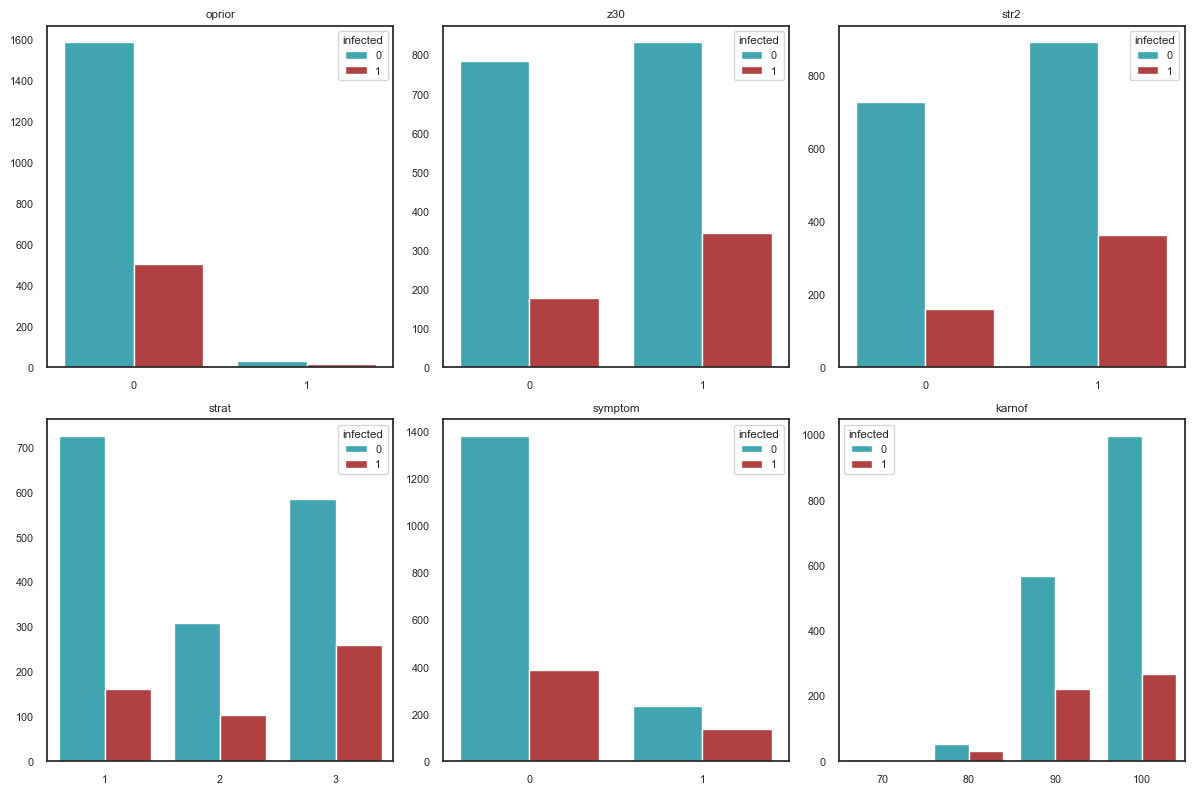

In [458]:
lab_cols = ['oprior', 'z30', 'str2', 'strat', 'symptom', 'karnof']
lab_plots = len(lab_cols)
cols_per_row = 3 
rows = (lab_plots - 1) // cols_per_row + 1

fig, axes = plt.subplots(nrows=rows, ncols=cols_per_row, figsize=(12, 8))
axes = axes.flatten()
sns.set_style("white")

for i, column in enumerate(lab_cols):
    ax = axes[i]
    contingency_tab = pd.crosstab(df[column], df['infected']).reset_index()
    melted_df = pd.melt(contingency_tab, id_vars=[column],
                        var_name='infected', value_name='Value')
    sns.barplot(data=melted_df, x=column, y='Value', ax=ax,
                hue='infected', palette=['#2DB2C4','#C42D2D'])
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_title(column)

# Remove empty subplots if the number of plots doesn't fill the entire grid
for i in range(lab_plots, len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()

#### c. Treatment

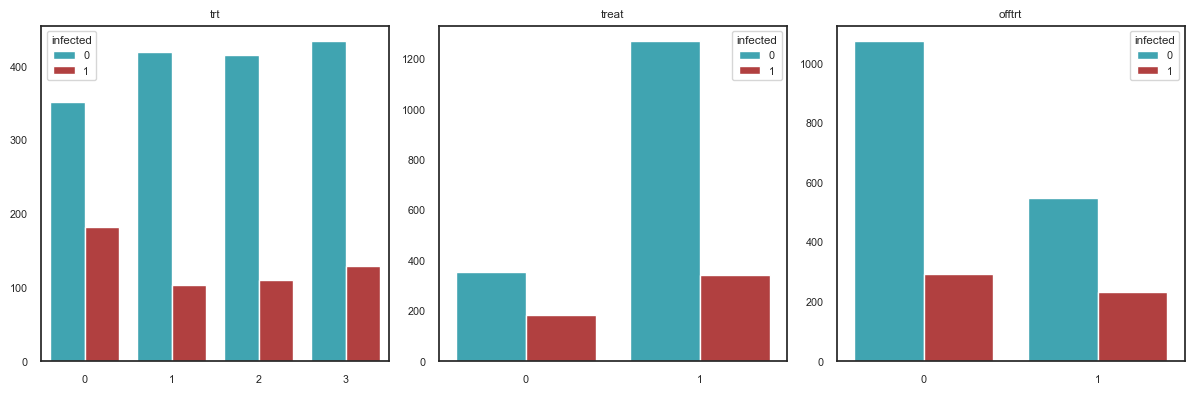

In [459]:
treat_cols = ['trt', 'treat', 'offtrt']
treat_plots = len(treat_cols)
cols_per_row = 3  # Adjust as per your preference
rows = (treat_plots - 1) // cols_per_row + 1

fig, axes = plt.subplots(nrows=rows, ncols=cols_per_row, figsize=(12, 4))
axes = axes.flatten()
sns.set_style("white")

for i, column in enumerate(treat_cols):
    ax = axes[i]
    contingency_tab = pd.crosstab(df[column], df['infected']).reset_index()
    melted_df = pd.melt(contingency_tab, id_vars=[column],
                        var_name='infected', value_name='Value')
    sns.barplot(data=melted_df, x=column, y='Value', ax=ax,
                hue='infected', palette=['#2DB2C4','#C42D2D'])
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_title(column)

# Remove empty subplots if the number of plots doesn't fill the entire grid
for i in range(treat_plots, len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()

## 2.3. Correlation matrix between numercial variables

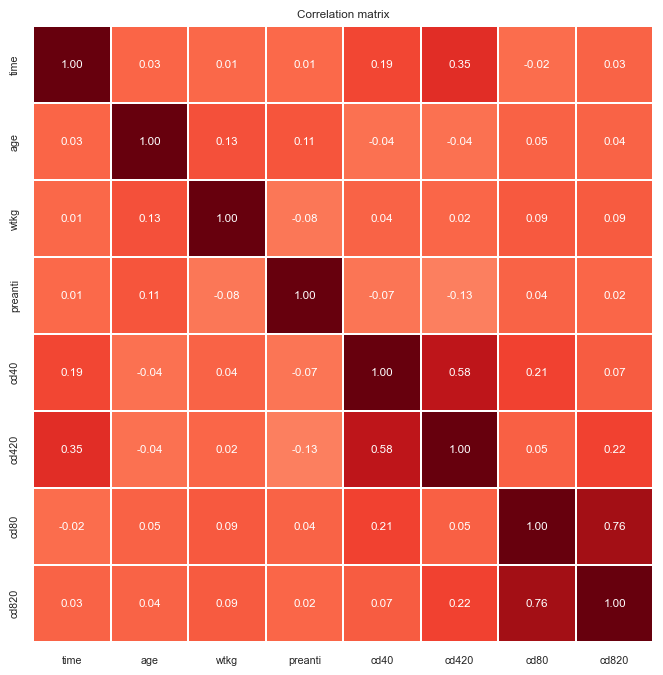

In [460]:
plt.figure(figsize=(8,8))
sns.heatmap(data=df[num_cols].corr(), vmin=-1, vmax=1,
            cmap="Reds", annot=True, cbar=False, fmt=".2f",
            linewidths=0.1)
plt.title('Correlation matrix')
plt.show()

# 3. Splitting Data

In [461]:
from sklearn.model_selection import train_test_split
X = df.drop('infected', axis=1)
y = df['infected'].copy()

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=11,
                                                    stratify=df['infected'])

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1711, 22), (428, 22), (1711,), (428,))

# 4. Feature Enginerring

## 4.1. Creating Dummies

In [462]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first')

encoded_cols = ['trt', 'karnof', 'strat']

encoded_x_train = pd.DataFrame(encoder.fit_transform(x_train[encoded_cols]).toarray(),
                               columns=encoder.get_feature_names_out())

encoded_x_test = pd.DataFrame(encoder.fit_transform(x_test[encoded_cols]).toarray(),
                              columns=encoder.get_feature_names_out())

## 4.2. Scaling

In [463]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled_cols = x_train.drop(encoded_cols, axis=1).columns

scaled_x_train = pd.DataFrame(scaler.fit_transform(x_train[scaled_cols]),
                              columns=scaler.get_feature_names_out())

scaled_x_test = pd.DataFrame(scaler.fit_transform(x_test[scaled_cols]),
                             columns=scaler.get_feature_names_out())

In [464]:
prepared_x_train = pd.concat([encoded_x_train, scaled_x_train], axis=1)
prepared_x_test = pd.concat([encoded_x_test, scaled_x_test], axis=1)

prepared_x_train.shape, prepared_x_test.shape

((1711, 27), (428, 27))

In [465]:
prepared_x_train

,trt_1,trt_2,trt_3,karnof_80,karnof_90,karnof_100,strat_2,strat_3,time,age,...,race,gender,str2,symptom,treat,offtrt,cd40,cd420,cd80,cd820
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.957272,0.178571,...,1.0,1.0,0.0,0.0,1.0,0.0,0.646372,0.762617,0.166265,0.129356
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.456861,0.642857,...,0.0,0.0,1.0,0.0,0.0,0.0,0.103420,0.114953,0.146988,0.299825
2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.866886,0.678571,...,0.0,1.0,0.0,1.0,1.0,0.0,0.326105,0.366355,0.181446,0.164202
3,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.380444,0.625000,...,0.0,1.0,1.0,0.0,1.0,0.0,0.191827,0.097196,0.083133,0.022562
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.442071,0.303571,...,1.0,0.0,0.0,0.0,1.0,1.0,0.267723,0.262617,0.361687,0.176987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1706,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.356615,0.803571,...,1.0,1.0,0.0,0.0,1.0,1.0,0.332777,0.261682,0.141928,0.189020
1707,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.588332,0.767857,...,0.0,1.0,1.0,0.0,0.0,0.0,0.260217,0.185047,0.215663,0.269491
1708,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.643385,0.482143,...,0.0,1.0,0.0,0.0,0.0,1.0,0.338616,0.469159,0.125060,0.217598
1709,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.884141,0.357143,...,0.0,1.0,1.0,0.0,0.0,0.0,0.312761,0.240187,0.110843,0.101279


# 5. Developing Models

In [466]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

## 5.1. Random Forest

In [467]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=11)

rf_params = {
    'max_depth': [5, 10, 15, None],
    'max_features': [10, 15, 20, None],
    'criterion': ['gini', 'entropy']
}

grid_rf = GridSearchCV(rf, rf_params, scoring='balanced_accuracy',
                       return_train_score=True, cv=5)

grid_rf.fit(prepared_x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=11),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, None],
                         'max_features': [10, 15, 20, None]},
             return_train_score=True, scoring='balanced_accuracy')

In [468]:
cv_result = pd.DataFrame(grid_rf.cv_results_)[['param_max_depth',
                                              'param_max_features',
                                              'param_criterion',
                                              'mean_train_score',
                                              'mean_test_score']].sort_values('mean_test_score', ascending=False)
cv_result.head()

,param_max_depth,param_max_features,param_criterion,mean_train_score,mean_test_score
17,5,15,entropy,0.866047,0.831401
24,15,10,entropy,1.000000,0.828728
20,10,10,entropy,0.992206,0.828683
28,None,10,entropy,1.000000,0.828251
5,10,15,gini,0.991010,0.825389


In [469]:
best_rf = grid_rf.best_estimator_

## 5.2. Gradient Boosting

In [470]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=11)

gb_params = {
    'max_depth': [5, 10, 15, None],
    'max_features': [10, 15, 20, None],
    'learning_rate': [0.01, 0.1, 1]
}

grid_gb = GridSearchCV(gb, gb_params, scoring='balanced_accuracy',
                       return_train_score=True, cv=5)

grid_gb.fit(prepared_x_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=11),
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'max_depth': [5, 10, 15, None],
                         'max_features': [10, 15, 20, None]},
             return_train_score=True, scoring='balanced_accuracy')

In [471]:
cv_result = pd.DataFrame(grid_gb.cv_results_)[['param_max_depth',
                                              'param_max_features',
                                              'param_learning_rate',
                                              'mean_train_score',
                                              'mean_test_score']].sort_values('mean_test_score', ascending=False)
cv_result.head()

,param_max_depth,param_max_features,param_learning_rate,mean_train_score,mean_test_score
40,15,10,1,1.0,0.827910
20,10,10,0.1,1.0,0.827459
44,None,10,1,1.0,0.825060
28,None,10,0.1,1.0,0.823843
21,10,15,0.1,1.0,0.823502


In [472]:
best_gb = grid_gb.best_estimator_

## 5.3. Extra Trees

In [473]:
from sklearn.ensemble import ExtraTreesClassifier

et = ExtraTreesClassifier(random_state=11)

et_params = {
    'max_depth': [5, 10, 15, None],
    'max_features': [10, 15, 20, None],
    'criterion': ['gini', 'entropy']
}

grid_et = GridSearchCV(et, et_params, scoring='balanced_accuracy',
                       return_train_score=True, cv=5)

grid_et.fit(prepared_x_train, y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(random_state=11),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, None],
                         'max_features': [10, 15, 20, None]},
             return_train_score=True, scoring='balanced_accuracy')

In [474]:
cv_result = pd.DataFrame(grid_et.cv_results_)[['param_max_depth',
                                              'param_max_features',
                                              'param_criterion',
                                              'mean_train_score',
                                              'mean_test_score']].sort_values('mean_test_score', ascending=False)
cv_result.head()

,param_max_depth,param_max_features,param_criterion,mean_train_score,mean_test_score
31,None,None,entropy,1.000000,0.843717
27,15,None,entropy,1.000000,0.837768
22,10,20,entropy,0.983117,0.836856
23,10,None,entropy,0.987314,0.836124
21,10,15,entropy,0.975718,0.836038


In [475]:
best_et = grid_et.best_estimator_

## 5.4. Bagging Classifier

In [476]:
from sklearn.ensemble import BaggingClassifier

bg = BaggingClassifier(random_state=11)

bg_params = {
    'estimator': [best_rf, best_gb, best_et, None]
}

grid_bg = GridSearchCV(bg, bg_params, scoring='balanced_accuracy',
                       return_train_score=True, cv=5)

grid_bg.fit(prepared_x_train, y_train)

GridSearchCV(cv=5, estimator=BaggingClassifier(random_state=11),
             param_grid={'estimator': [RandomForestClassifier(criterion='entropy',
                                                              max_depth=5,
                                                              max_features=15,
                                                              random_state=11),
                                       GradientBoostingClassifier(learning_rate=1,
                                                                  max_depth=15,
                                                                  max_features=10,
                                                                  random_state=11),
                                       ExtraTreesClassifier(criterion='entropy',
                                                            max_features=None,
                                                            random_state=11),
                                       None]},
             return_train_score=True, scoring='balanced_accuracy')

In [477]:
cv_result = pd.DataFrame(grid_bg.cv_results_)[['param_estimator',
                                              'mean_train_score',
                                              'mean_test_score']].sort_values('mean_test_score', ascending=False)
cv_result.head()

,param_estimator,mean_train_score,mean_test_score
2,"(ExtraTreeClassifier(criterion='entropy', max_...",0.991030,0.833706
0,"(DecisionTreeClassifier(criterion='entropy', m...",0.862502,0.828666
1,([DecisionTreeRegressor(criterion='friedman_ms...,0.984377,0.827096
3,None,0.977840,0.783529


In [478]:
best_bg = grid_bg.best_estimator_

## 5.5. Voting Classifier

In [479]:
from sklearn.ensemble import VotingClassifier

vote = VotingClassifier([('RandomForest', best_rf),
                         ('GradienBoosting', best_gb),
                         ('ExtraTrees', best_et),
                         ('Bagging', best_bg)])

vote.fit(prepared_x_train, y_train)

VotingClassifier(estimators=[('RandomForest',
                              RandomForestClassifier(criterion='entropy',
                                                     max_depth=5,
                                                     max_features=15,
                                                     random_state=11)),
                             ('GradienBoosting',
                              GradientBoostingClassifier(learning_rate=1,
                                                         max_depth=15,
                                                         max_features=10,
                                                         random_state=11)),
                             ('ExtraTrees',
                              ExtraTreesClassifier(criterion='entropy',
                                                   max_features=None,
                                                   random_state=11)),
                             ('Bagging',
                              BaggingClassifier(estimator=ExtraTreesClassifier(criterion='entropy',
                                                                               max_features=None,
                                                                               random_state=11),
                                                random_state=11))])

# 6. Evaluation

In [485]:
model_list = [best_rf, best_gb, best_et, best_bg, vote]

for clf in model_list:
    y_pred = clf.predict(prepared_x_test)
    print(f"{clf.__class__.__name__} :  {accuracy_score(y_test, y_pred):.3f}")

RandomForestClassifier :  0.888
GradientBoostingClassifier :  0.879
ExtraTreesClassifier :  0.909
BaggingClassifier :  0.916
VotingClassifier :  0.900


In [486]:
for clf in model_list:
    y_pred = clf.predict(prepared_x_test)
    clas_report = classification_report(y_test, y_pred, digits=3)
    print(f"\n{clf.__class__.__name__}\n")
    print(clas_report)
    print('----------------------------------------------')


RandomForestClassifier

              precision    recall  f1-score   support

           0      0.894     0.966     0.929       324
           1      0.859     0.644     0.736       104

    accuracy                          0.888       428
   macro avg      0.877     0.805     0.833       428
weighted avg      0.886     0.888     0.882       428

----------------------------------------------

GradientBoostingClassifier

              precision    recall  f1-score   support

           0      0.898     0.948     0.922       324
           1      0.802     0.663     0.726       104

    accuracy                          0.879       428
   macro avg      0.850     0.805     0.824       428
weighted avg      0.874     0.879     0.874       428

----------------------------------------------

ExtraTreesClassifier

              precision    recall  f1-score   support

           0      0.923     0.960     0.941       324
           1      0.857     0.750     0.800       104

    accurac

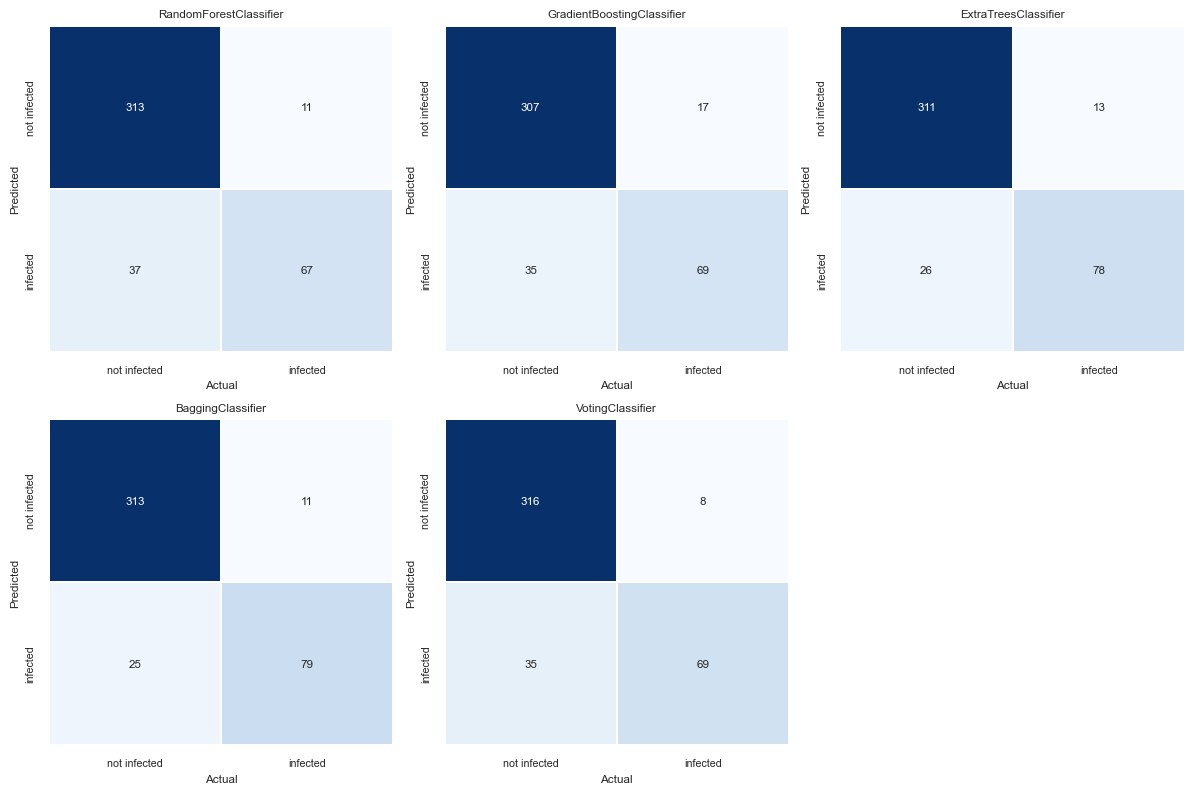

In [489]:
matrix_plots = len(model_list)
cols_per_row = 3
rows = (matrix_plots - 1) // cols_per_row + 1

fig, axes = plt.subplots(nrows=rows, ncols=cols_per_row, figsize=(12, 8))
axes = axes.flatten()
sns.set_style("white")

for i, clf in enumerate(model_list):
    ax = axes[i]

    y_pred = clf.predict(prepared_x_test)
    matrix = confusion_matrix(y_test, y_pred)

    sns.heatmap(matrix, annot=True, fmt="g", cmap="Blues", linewidths=0.1, cbar=False,
                xticklabels=["not infected", "infected"],
                yticklabels=["not infected", "infected"], ax=ax)
    
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predicted')
    ax.set_title(clf.__class__.__name__)

for i in range(matrix_plots, len(axes)):
    fig.delaxes(axes[i])
    
plt.tight_layout()
plt.show()